In [2]:
library("readr")
library("readxl")
library("ggplot2")

Warning message:
"il pacchetto 'ggplot2' è stato creato con R versione 4.4.3"


In [3]:
# import the datasets

In [4]:
DFR_rate <- read.csv("C:/Users/readytouse/Desktop/Magistrale/banking/project_2/data/DFR rate.csv")

In [5]:
MLF_rate <- read.csv("C:/Users/readytouse/Desktop/Magistrale/banking/project_2/data/MLF rate.csv")

In [6]:
MRO_rate <- read.csv("C:/Users/readytouse/Desktop/Magistrale/banking/project_2/data/MRO rate.csv")

In [7]:
TotVolume_HH <- read_excel("C:/Users/readytouse/Desktop/Magistrale/banking/project_2/data/ECB total loan HH.xlsx")

In [8]:
TotVolume_firms <- read_excel("C:/Users/readytouse/Desktop/Magistrale/banking/project_2/data/ECB total loan corporate.xlsx")

In [9]:
# transforming in ts and extracting the velues of the rates

ts_DFR_rate <- ts(DFR_rate$rate_DFR, start = 2019, frequency = 12)
ts_MLF_rate <- ts(MLF_rate$rate_MLF, start = 2019, frequency = 12)
ts_MRO_rate <- ts(MRO_rate$rate_MRO, start = 2019, frequency = 12)
ts_TotVolume_HH <- ts(TotVolume_HH$`volume(millions of euros)`, start = 2019, frequency = 12)
ts_TotVolume_firms <- ts(TotVolume_firms$`volume(millions of euros)`, start = 2019, frequency = 12)
ts_Tot_volume <- ts_TotVolume_firms + ts_TotVolume_HH   # creating the tot volume seire, summing up the two volume serie



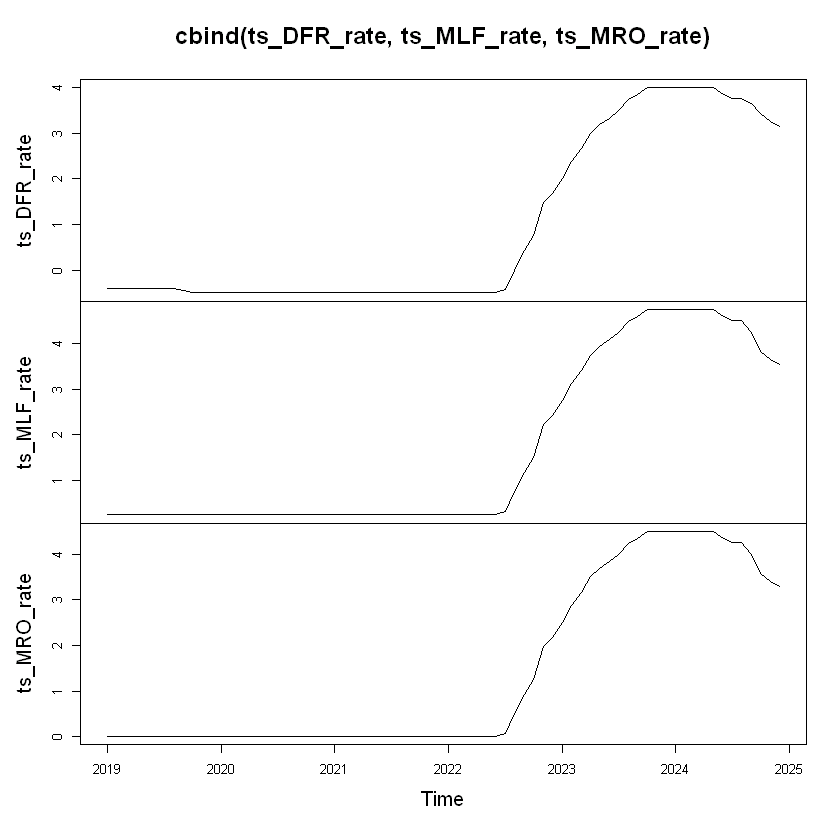

In [10]:
# plotting the rates

plot(cbind(ts_DFR_rate, ts_MLF_rate, ts_MRO_rate))   #plotting the rates all toghter

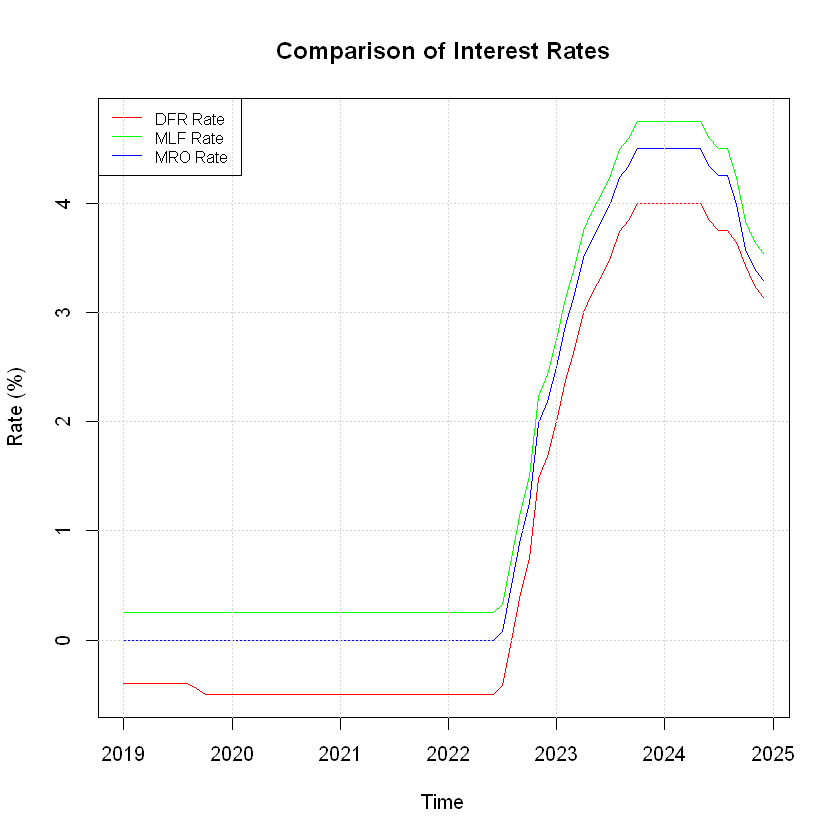

In [11]:
ts.plot(ts_DFR_rate, ts_MLF_rate, ts_MRO_rate, 
        col = c("red", "green", "blue"), 
        lty = 1, 
        xlab = "Time", 
        ylab = "Rate (%)", 
        main = "Comparison of Interest Rates")

legend("topleft", legend = c("DFR Rate", "MLF Rate", "MRO Rate"), 
       col = c("red", "green", "blue"), 
       lty = 1, cex = 0.8)
grid()

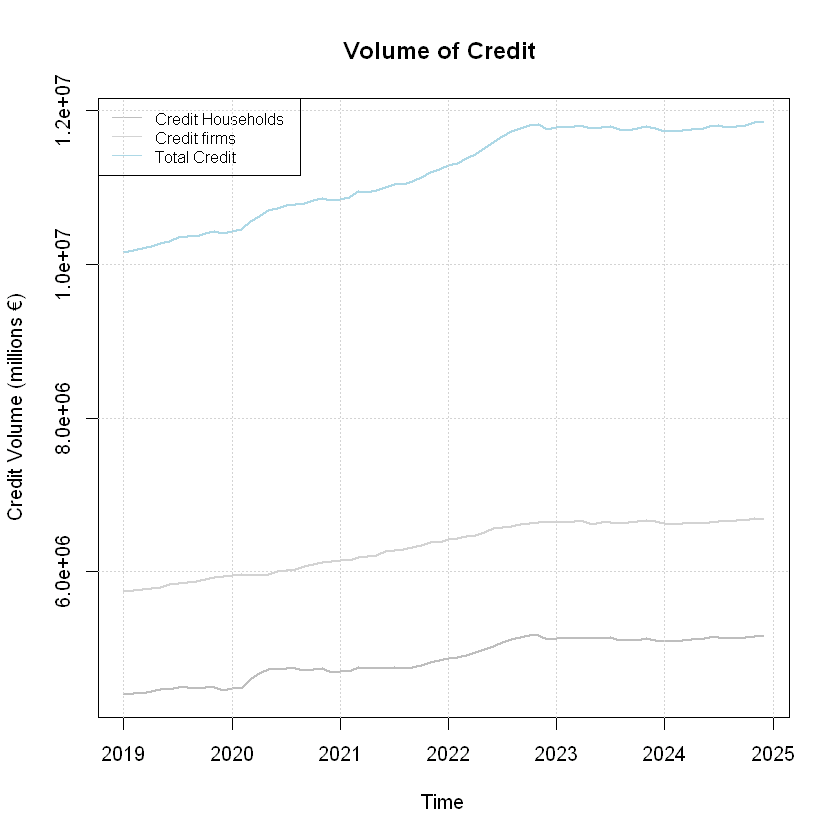

In [12]:
# plotting the volumes

ts.plot(ts_TotVolume_HH, ts_TotVolume_firms, ts_Tot_volume, 
        col = c("grey", "light grey", "light blue"), 
        lty = 1,
        lwd = 2,
        xlab = "Time", 
        ylab = "Credit Volume (millions €)", 
        main = "Volume of Credit ")

legend("topleft", legend = c("Credit Households", "Credit firms", "Total Credit"), 
       col = c("grey", "light grey", "light blue"), 
       lty = 1, cex = 0.8)
grid()

In [13]:
# extracting the trend from the total volume serie

ts_Tot_volume <- ts_TotVolume_firms + ts_TotVolume_HH   # creating the tot volume seire, summing up the two volume serie
decomposed_Tot_volume <- decompose(ts_Tot_volume)
trend_Tot_volume <- decomposed_Tot_volume$trend  # extracting the trend

In [14]:
# extracting the trend from the total volume households

decomposed_volume_HH <- decompose(ts_TotVolume_HH)
trend_volume_HH <- decomposed_volume_HH$trend   # extracting the trend
trend_volume_HH <- na.omit(trend_volume_HH)  

In [15]:
# extracting the trend from the total volume firms

decompose_volume_firms <- decompose(ts_TotVolume_firms)
trend_volume_firms <- decompose_volume_firms$trend  # extracting the trend
rend_volume_firms <- na.omit(trend_volume_firms)

In [16]:
#create the new time series july 2019 - july 2024 

ts_DFR_rate <- window(ts_DFR_rate, start = c(2019,7), end=c(2024,6))
ts_MRO_rate <- window(ts_MRO_rate, start = c(2019,7), end=c(2024,6))
ts_MLF_rate <- window(ts_MLF_rate, start = c(2019,7), end=c(2024,6))
trend_volume_HH <- window(trend_volume_HH, start = c(2019,7), end=c(2024,6))
trend_volume_firms <- window(trend_volume_firms, start = c(2019,7), end=c(2024,6))
trend_Tot_volume <- window(trend_Tot_volume, start = c(2019,7), end=c(2024,6))

In [17]:
# creating a one singular dataframe

df <- data.frame(
    time = seq(as.Date("2019-07-01"), by = "month", length.out = length(ts_MRO_rate)),
    MRO_rate = as.numeric(ts_MRO_rate),
    DFR_rate = as.numeric(ts_DFR_rate),
    MLF_rate = as.numeric(ts_MLF_rate),
    Total_volume = as.numeric(trend_Tot_volume))

head(df)

,time,MRO_rate,DFR_rate,MLF_rate,Total_volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-07-01,0,-0.40,0.25,10314157
2,2019-08-01,0,-0.40,0.25,10337163
3,2019-09-01,0,-0.44,0.25,10363569
4,2019-10-01,0,-0.50,0.25,10394564
5,2019-11-01,0,-0.50,0.25,10428566
6,2019-12-01,0,-0.50,0.25,10464267


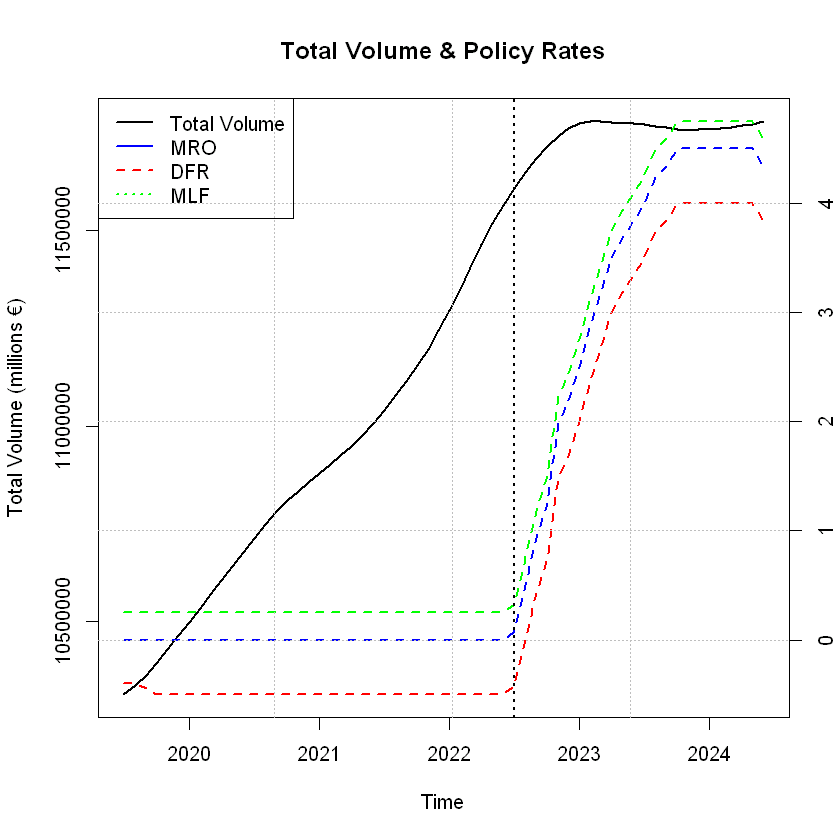

In [18]:
# creating the summarise plot

plot(df$time, df$Total_volume, type = "l", col = "black", lwd = 2,
     xlab = "Time", ylab = "Total Volume (millions €)",
     ylim = range(df$Total_volume, na.rm = TRUE),
     main = "Total Volume & Policy Rates")
par(new = TRUE)
range_rates <- range(c(df$MRO_rate, df$DFR_rate, df$MLF_rate), na.rm = TRUE)
plot(df$time, df$MRO_rate, type = "n", axes = FALSE, xlab = "", ylab = "",
     ylim = range_rates)
# Add the rates to the plot

lines(df$time, df$MRO_rate, col = "blue", lwd = 2, lty = 2)
lines(df$time, df$DFR_rate, col = "red", lwd = 2, lty = 2)
lines(df$time, df$MLF_rate, col = "green", lwd = 2, lty = 2)

# Creating the other y axis

axis(side = 4)
mtext("Rates (%)", side = 4, line = 3)

# Create the legend

legend("topleft",
       legend = c("Total Volume", "MRO", "DFR", "MLF"),
       col = c("black", "blue", "red", "green"),
       lty = c(1, 1, 2, 3), lwd = 2)
grid(col = "gray", lty = 3) 

date_increase_rate <- as.Date("2022-07-01")
abline(v=date_increase_rate, col="black", lty=3, lwd=2)


In [19]:
# first regression model: MRO rate vs TOT VOLUME CREDIT

lm_tot_volume <- lm(trend_Tot_volume ~ ts_MRO_rate)
summary(lm_tot_volume)


Call:
lm(formula = trend_Tot_volume ~ ts_MRO_rate)

Residuals:
    Min      1Q  Median      3Q     Max 
-637972 -148961  -58604  232761  639133 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10952128      53293 205.506  < 2e-16 ***
ts_MRO_rate   208048      23446   8.873 2.15e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 335700 on 58 degrees of freedom
Multiple R-squared:  0.5758,	Adjusted R-squared:  0.5685 
F-statistic: 78.74 on 1 and 58 DF,  p-value: 2.146e-12


In [20]:
# second regression model: MRO rate vs VOLUME HH credit

lm_HH <- lm(trend_volume_HH ~ ts_MRO_rate)
summary(lm_HH)


Call:
lm(formula = trend_volume_HH ~ ts_MRO_rate)

Residuals:
    Min      1Q  Median      3Q     Max 
-287236  -62276  -22241   88043  288202 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4754566      23104 205.790  < 2e-16 ***
ts_MRO_rate    94809      10164   9.328 3.84e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 145500 on 58 degrees of freedom
Multiple R-squared:    0.6,	Adjusted R-squared:  0.5931 
F-statistic:    87 on 1 and 58 DF,  p-value: 3.837e-13


In [21]:
# third regression model: MRO rate vs VOLUME FIRMS credit

lm_firms <- lm(trend_volume_firms ~ ts_MRO_rate)
summary(lm_firms)


Call:
lm(formula = trend_volume_firms ~ ts_MRO_rate)

Residuals:
    Min      1Q  Median      3Q     Max 
-350736 -118787  -31199  148810  350931 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6197562      30510 203.136  < 2e-16 ***
ts_MRO_rate   113239      13422   8.437 1.14e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 192200 on 58 degrees of freedom
Multiple R-squared:  0.551,	Adjusted R-squared:  0.5433 
F-statistic: 71.17 on 1 and 58 DF,  p-value: 1.141e-11


In [22]:
# testing the significance of the coefficients with robust SE

library("lmtest")
library("sandwich")

coeftest(lm_tot_volume, vcov = vcovHC(lm_tot_volume, type = "HC0"))
coeftest(lm_HH, vcov = vcovHC(lm_HH, type = "HC0"))
coeftest(lm_firms, vcov = vcovHC(lm_firms, type = "HC0"))

Caricamento del pacchetto richiesto: zoo


Caricamento pacchetto: 'zoo'


I seguenti oggetti sono mascherati da 'package:base':

    as.Date, as.Date.numeric


Warning message:
"il pacchetto 'sandwich' è stato creato con R versione 4.4.2"



t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 10952128      59948 182.695 < 2.2e-16 ***
ts_MRO_rate   208048      16215  12.831 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  4754566      25585 185.836 < 2.2e-16 ***
ts_MRO_rate    94809       7046  13.456 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 6197562.3    34733.9 178.430 < 2.2e-16 ***
ts_MRO_rate  113238.8     9273.8  12.211 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [23]:
# extracting the coefficients of the regressions

coefficients(lm_HH); # Households
coefficients(lm_firms); # Firms
coefficients(lm_tot_volume) # tot volume

(Intercept) ts_MRO_rate 
 4754565.81    94809.37

(Intercept) ts_MRO_rate 
  6197562.3    113238.8

(Intercept) ts_MRO_rate 
 10952128.1    208048.2